## Module 4: Mpox (DR Congo 2023-2025)


## Team Members:
Meredith Lineweaver and Medha Tadavarthi

## Project Title:
Monkeypox in the DR Congo from 2023-2025


## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence: There has been an outbreak of monkeypox in the DR Congo with incidence in 2023 being 15,000 cases and increasing to 54,000 cases in 2024. There are currently over 46,000 cases in central and east Africa. Since the beginning of the year, in the DRC, there have been 20,000 reported cases of mpox and over 630 deaths. However, there is not a great system for reporting cases so these numbers are estimations. This outbreak has been deemed a public health emergency by the World Health Organization. 
* Economic burden: These outbreaks place a significant strain on healthcare financing in Africa. This leads to inadequate allocation of resources in an already overburdened healthcare system. This also raises the costs of out-of-pocket health expenses. The average allocation of government budgets to healthcare across Africa is 7.2%. An estimated $245 million is needed to combat the grwoing mpox outbreak in Africa and only 10% of that number has been secured. This means most of the financial burden is on patients. The average price for the mpox vaccine in Africa is between $100 and $140 per dose. 
* Risk factors (genetic, lifestyle) & Societal determinants: The biggest risk factor is coming into contact with someone that has the disease. However certain factors can cause more severe illness such as having a weakened immune system, a young age, and pregnancy. Specifically in the DR Congo risks include malnutrition, poor sanitation, population displacement, and ongoing conflict that weakens health systems and increase transmission. Sexual contact including having multiple sexual partners and unprotected anal sex. 
* Symptoms: Rash, fever, exhaustation, swollen lympth nodes, muscle aches, sore throat, blisters that crust over. 
* Diagnosis: Diagnosed by a healthcare provider that swabs the rash and the sample is tested in a lab (such as PCR test). 
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): Folowing exposure to the respiratory secretions or bodily fluids of Mpox patients, the virus enters nearby tissues through mucous membrances or broken skin. The disease starts by entering a host cell, which is typically the skin. The virus replicates its DNA in the cytoplasm and assembles new virus particles. It then releases them to infect other cells. It first spreads to nearby lymph nodes and then into the bloodstream and other organs for a systemic infection. The virus also needs to evade the immune system so it will secrete proteins that interfere with immune signals and immune cell function. 

Sources: 
* https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(25)00137-0/fulltext
* https://www.cdc.gov/monkeypox/situation-summary/index.html
* https://www.doctorswithoutborders.org/latest/mpox-outbreak-dr-congo-what-know
* https://pmc.ncbi.nlm.nih.gov/articles/PMC11638650/
* https://www.nature.com/articles/s41392-023-01675-2

## Dataset: 

The data set we will analyze is a csv file that has the date in one column and the confirmed number of new cases for that week in the other column. This data was obtained by reporting the number of confirmed cases as defined by WHO's working case definition published in the surveilance, case investigation and contact tracing for mpox interim guidance. For the DR Congo there is suboptimal testing rate so both laboratory confirmed cases and suspected cases are shown. 

Source of the data: https://worldhealthorg.shinyapps.io/mpx_global/_w_916c8baf/_w_a524e3ae26d84d45bd7af0be6a7698a9/#sec-down

           date  confirmed_cases
0    2023-01-08                1
1    2023-01-15                1
2    2023-01-22                4
3    2023-01-29                1
4    2023-02-05                0
..          ...              ...
138  2025-08-31              371
139  2025-09-07              339
140  2025-09-14              428
141  2025-09-21              230
142  2025-09-28              286

[143 rows x 2 columns]


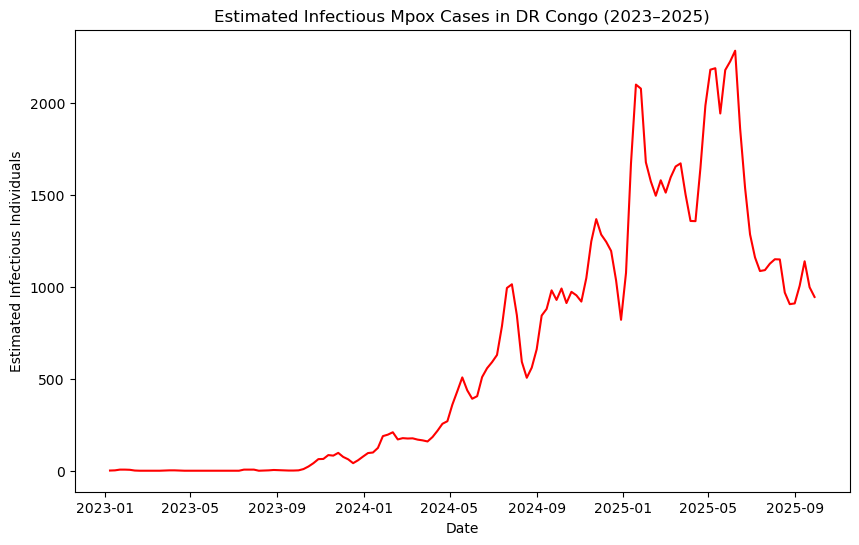

In [4]:
## LOAD YOUR DATASET HERE.
import os
os.chdir("/Users/meredithlineweaver/Desktop/Computational BME/Module 4/")
import pandas as pd
from main_functions import convert_cumulative_to_SIR
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 1. Read in the csv file of cumulative cases.
df = pd.read_csv("/Users/meredithlineweaver/Desktop/Computational BME/Module 4/mpox_dem_rep_of_congo_data_2023_2025_new_cases.csv")
print(df)
df['date'] = pd.to_datetime(df['date'])

# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
df['cumulative_cases'] = df['confirmed_cases'].cumsum()
population = 109075560 #individuals
infectious_period = 3

df_sir = convert_cumulative_to_SIR(
    df,
    date_col = "date",
    cumulative_col = "cumulative_cases",
    population = population, 
    infectious_period = infectious_period, 
    new_case_col = "new_cases",
    I_col = 'I_est', 
    R_col = "R_est", 
    S_col = "S_est"
)


# 3. Plot S, I, R over time.
plt.figure(figsize=(10,6))
plt.plot(df_sir['date'], df_sir['I_est'], color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Infectious Individuals')
plt.title('Estimated Infectious Mpox Cases in DR Congo (2023–2025)')
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.* combined euler's method with optimization of SSE to pick best beta and gamma for our data set


### Analysis


### 1. Fitting the SIR model

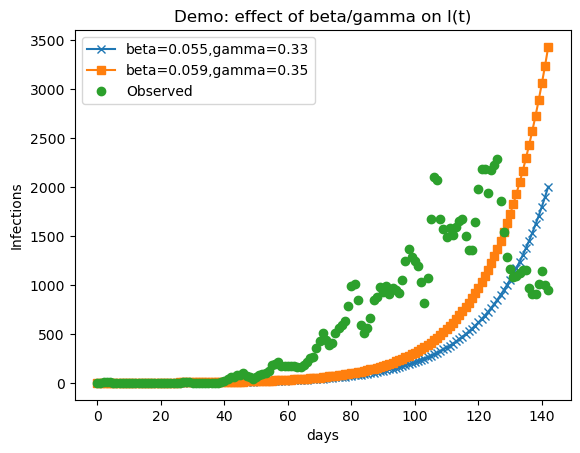

The SSE for beta1 and gamma1 is 439061.62421274977
The SSE for beta2 and gamma2 is 504927.423875793
Best fit parameters:
  beta =  0.05611222444889779
  gamma = 0.0
  SSE =   431840.58840150584


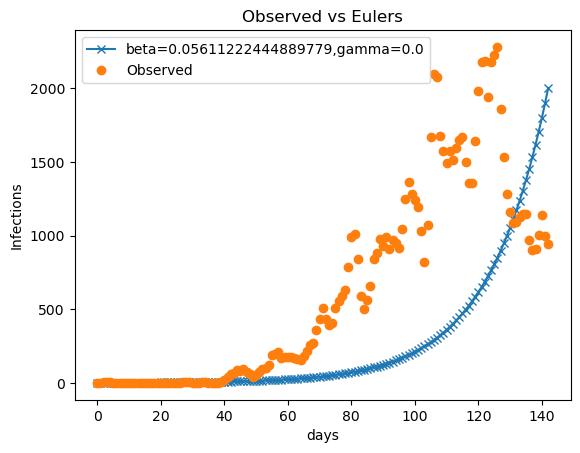

In [22]:
import numpy as np
import os
os.chdir("/Users/meredithlineweaver/Desktop/Computational BME/Module 4/")
from main_functions import euler_sir

#Get S(t), l(t), and R(t) using Euler's method
I_obs = df_sir['I_est'].values.astype(float) #Sets up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = df_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

#Plug in guesses for gamma and beta
beta1 = 0.055 #random guess for beta
gamma1 = 0.33 #random guess for gamma
beta2 = 0.059 #alternative guesses
gamma2 = 0.35 #alternative guesses
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, population)
S2,I2,R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, population)

#Plot model predictions and true l(t) and try to pick gamma and beta that make the model solution fit your data
plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

#Calculate SSE between model and true l(t)
print("The SSE for beta1 and gamma1 is",np.mean((I1 - I_obs)**2))

print("The SSE for beta2 and gamma2 is",np.mean((I2 - I_obs)**2))

# Use an optimization routine to minimize SSE and find the best-fitting parameters. Can you systematically select gamma and beta to minimize sse? 
beta_values = np.linspace(0, 1, 500)    
gamma_values = np.linspace(0, 1, 500)    

best_sse = np.inf
best_beta = None
best_gamma = None

# Nested loop: try all (beta, gamma) pairs
for beta in beta_values:
    for gamma in gamma_values:
        
        # Run SIR model
        S_test, I_test, R_test = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, population)
        
        # Compute SSE
        sse = np.mean((I_test - I_obs)**2)
        
        # Check if it's the best so far
        if sse < best_sse:
            best_sse = sse
            best_beta = beta
            best_gamma = gamma

# Print results
print("Best fit parameters:")
print(f"  beta =  {best_beta}")
print(f"  gamma = {best_gamma}")
print(f"  SSE =   {best_sse}")


S,I,R = euler_sir(best_beta, best_gamma,S0_obs, I0_obs, R0_obs, t_obs, population)
plt.plot(t_obs, I1, label=f'beta={best_beta},gamma={best_gamma}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Observed vs Eulers')
plt.show()

### 2. Predict "the future" with your fit SIR model

In [23]:
#Use Euler's method and your optimization routine above to find new gamma and beta on the FIRST HALF of the data 
midpoint = len(df_sir)//2
first_half_df = df_sir.iloc[:midpoint] #df of first half of data

I0_obs = df_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs
Sf,If,Rf = euler_sir(beta, gamma,S0_obs, I0_obs, R0_obs, t_obs, population)

beta_f_values = np.linspace(0, 1, 500)    
gamma_f_values = np.linspace(0, 1, 500)    

best_sse = np.inf
best_beta_f = None
best_gamma_f = None

# Nested loop: try all (beta, gamma) pairs
for beta in beta_values:
    for gamma in gamma_values:
        
        # Run SIR model
        S_test, I_test, R_test = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, population)
        
        # Compute SSE
        sse = np.mean((I_test - I_obs)**2)
        
        # Check if it's the best so far
        if sse < best_sse:
            best_sse = sse
            best_beta = beta
            best_gamma = gamma

# Print results
print("Best fit parameters:")
print(f"  beta =  {best_beta}")
print(f"  gamma = {best_gamma}")
print(f"  SSE =   {best_sse}")

#Simulate the SIR model forward in time using those parameters and plot

Best fit parameters:
  beta =  0.05611222444889779
  gamma = 0.0
  SSE =   431840.58840150584


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

*Answer here*

In [ ]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.

**Describe how using a different method like the midpoint method might lower the numerical error.**

*Fill in your answer here.*

### 3. Decreasing numerical error with the RK4 method

In [ ]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.
import numpy as np
from scipy.integrate import solve_ivp

**Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?**

*Fill in answer here*

In [ ]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.

### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

In [ ]:
# Extended model implementation, parameter fitting, and plotting.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*